In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('food_nutrients_pivot.csv')
columns = []
for column in df.columns:
    columns.append(column)

print(columns)
print(len(columns))

['Food Name', 'Alanine (G)', 'Alcohol, ethyl (G)', 'Arginine (G)', 'Ash (G)', 'Aspartic acid (G)', 'Beta-sitosterol (MG)', 'Betaine (MG)', 'Caffeine (MG)', 'Calcium, Ca (MG)', 'Campesterol (MG)', 'Carbohydrate, by difference (G)', 'Carotene, alpha (UG)', 'Carotene, beta (UG)', 'Cholesterol (MG)', 'Choline, total (MG)', 'Copper, Cu (MG)', 'Cryptoxanthin, beta (UG)', 'Cystine (G)', 'Energy (KCAL)', 'Energy (kJ)', 'Fatty acids, total monounsaturated (G)', 'Fatty acids, total polyunsaturated (G)', 'Fatty acids, total saturated (G)', 'Fatty acids, total trans (G)', 'Fatty acids, total trans-monoenoic (G)', 'Fatty acids, total trans-polyenoic (G)', 'Fiber, total dietary (G)', 'Fluoride, F (UG)', 'Folate, DFE (UG)', 'Folate, food (UG)', 'Folate, total (UG)', 'Folic acid (UG)', 'Fructose (G)', 'Galactose (G)', 'Glucose (G)', 'Glutamic acid (G)', 'Glycine (G)', 'Histidine (G)', 'Hydroxyproline (G)', 'Iron, Fe (MG)', 'Isoleucine (G)', 'Lactose (G)', 'Leucine (G)', 'Lutein + zeaxanthin (UG)', 'Ly

In [22]:
# List of macro and micronutrient columns + food name
selected_columns = [
    'Food Name',
    # Macronutrients
    'Protein (G)', 'Carbohydrate, by difference (G)', 'Sugars, Total (G)', 'Fiber, total dietary (G)',
    'Total lipid (fat) (G)', 'Energy (KCAL)', 'Energy (kJ)', 'Water (G)',
    
    # Common vitamins
    'Vitamin A, IU (IU)', 'Vitamin A, RAE (UG)', 'Vitamin B-12 (UG)', 'Vitamin B-12, added (UG)', 
    'Vitamin B-6 (MG)', 'Vitamin C, total ascorbic acid (MG)', 'Vitamin D (D2 + D3) (UG)',
    'Vitamin D (D2 + D3), International Units (IU)', 'Vitamin E (alpha-tocopherol) (MG)', 
    'Vitamin E, added (MG)', 'Vitamin K (phylloquinone) (UG)', 'Thiamin (MG)', 'Riboflavin (MG)', 
    
    # Common minerals
    'Calcium, Ca (MG)', 'Iron, Fe (MG)', 'Magnesium, Mg (MG)', 'Phosphorus, P (MG)',
    'Potassium, K (MG)', 'Sodium, Na (MG)', 'Zinc, Zn (MG)', 'Selenium, Se (UG)', 
    'Copper, Cu (MG)', 'Manganese, Mn (MG)',
]

# Filter the dataframe
filtered_df = df[selected_columns]

# Save or use the filtered dataframe
filtered_df.to_csv("filtered_food_data.csv", index=False)


In [23]:

null_counts = filtered_df.isnull().sum()
print(null_counts)


Food Name                                           0
Protein (G)                                         0
Carbohydrate, by difference (G)                     0
Sugars, Total (G)                                1786
Fiber, total dietary (G)                          562
Total lipid (fat) (G)                               0
Energy (KCAL)                                       0
Energy (kJ)                                         0
Water (G)                                           0
Vitamin A, IU (IU)                                437
Vitamin A, RAE (UG)                               875
Vitamin B-12 (UG)                                 680
Vitamin B-12, added (UG)                         3031
Vitamin B-6 (MG)                                  531
Vitamin C, total ascorbic acid (MG)               461
Vitamin D (D2 + D3) (UG)                         2608
Vitamin D (D2 + D3), International Units (IU)    2612
Vitamin E (alpha-tocopherol) (MG)                2213
Vitamin E, added (MG)       

In [24]:

numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns
filtered_df[numeric_cols] = filtered_df[numeric_cols].fillna(0.0)


C:\Users\akash\AppData\Local\Temp\ipykernel_22228\1598369648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numeric_cols] = filtered_df[numeric_cols].fillna(0.0)


In [25]:

null_counts = filtered_df.isnull().sum()
print(null_counts)


Food Name                                        0
Protein (G)                                      0
Carbohydrate, by difference (G)                  0
Sugars, Total (G)                                0
Fiber, total dietary (G)                         0
Total lipid (fat) (G)                            0
Energy (KCAL)                                    0
Energy (kJ)                                      0
Water (G)                                        0
Vitamin A, IU (IU)                               0
Vitamin A, RAE (UG)                              0
Vitamin B-12 (UG)                                0
Vitamin B-12, added (UG)                         0
Vitamin B-6 (MG)                                 0
Vitamin C, total ascorbic acid (MG)              0
Vitamin D (D2 + D3) (UG)                         0
Vitamin D (D2 + D3), International Units (IU)    0
Vitamin E (alpha-tocopherol) (MG)                0
Vitamin E, added (MG)                            0
Vitamin K (phylloquinone) (UG) 

In [26]:
# Convert mg to g
mg_cols = [col for col in filtered_df.columns if '(MG)' in col.upper()]
filtered_df[mg_cols] = filtered_df[mg_cols] / 1000.0

# Convert µg to g
ug_cols = [col for col in filtered_df.columns if '(UG)' in col.upper()]
filtered_df[ug_cols] = filtered_df[ug_cols] / 1_000_000.0

# Optionally, convert kcal to kJ
filtered_df['Energy (kJ)'] = filtered_df['Energy (KCAL)'] * 4.184


C:\Users\akash\AppData\Local\Temp\ipykernel_22228\925760590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[mg_cols] = filtered_df[mg_cols] / 1000.0
C:\Users\akash\AppData\Local\Temp\ipykernel_22228\925760590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[ug_cols] = filtered_df[ug_cols] / 1_000_000.0
C:\Users\akash\AppData\Local\Temp\ipykernel_22228\925760590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

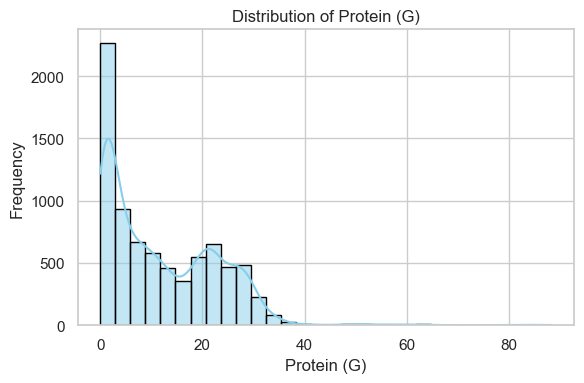

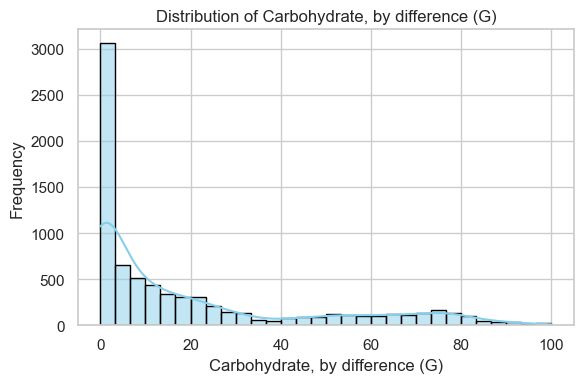

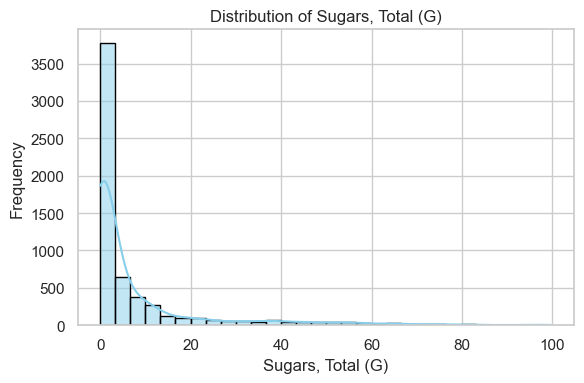

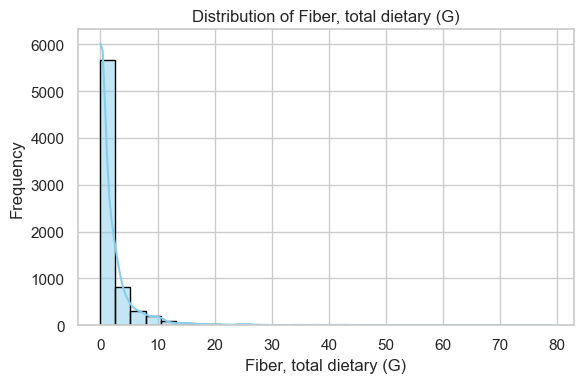

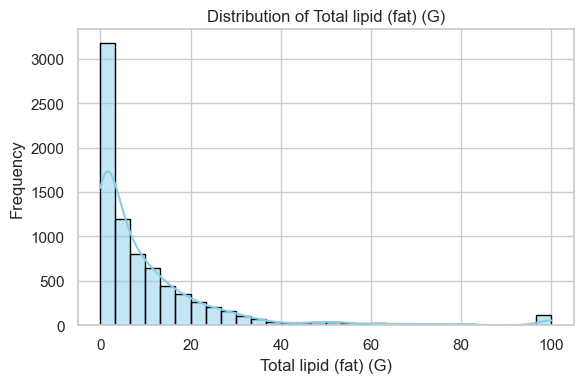

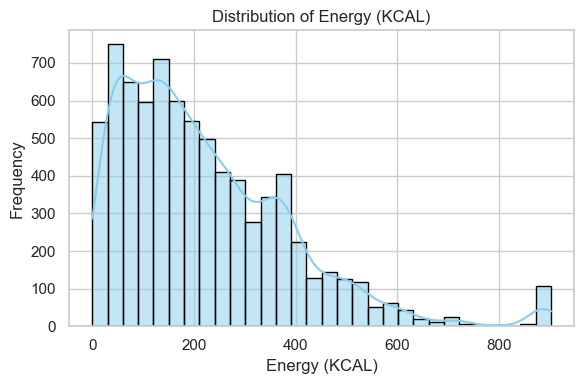

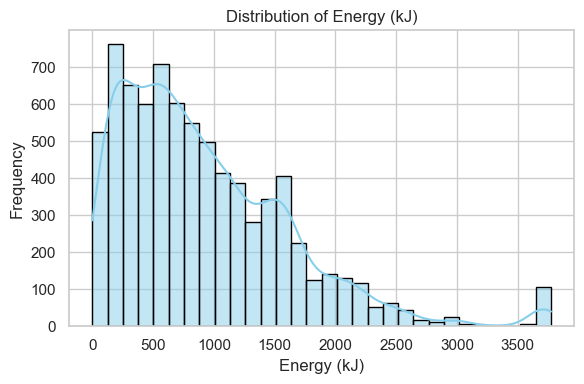

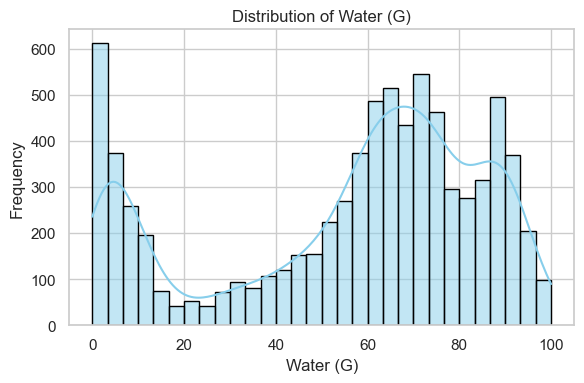

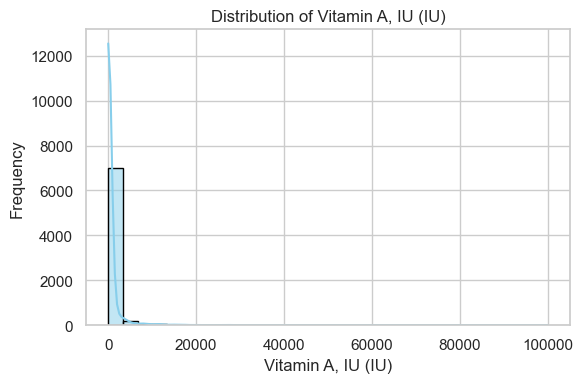

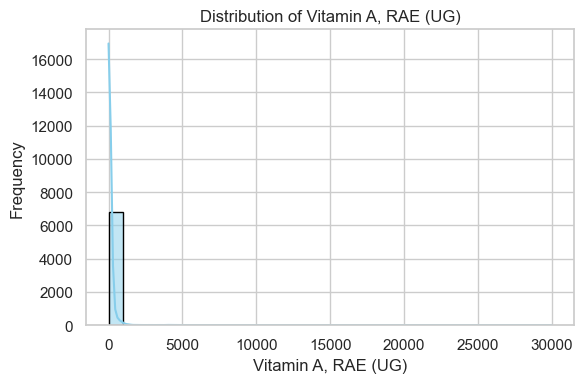

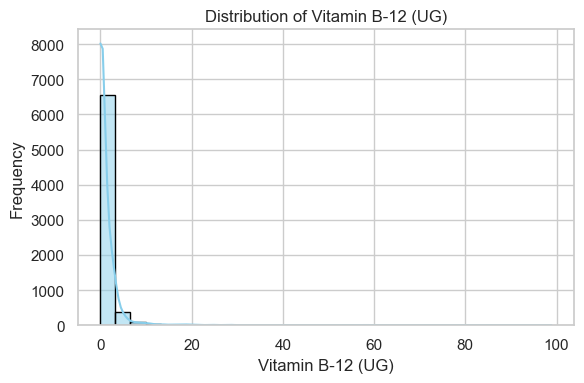

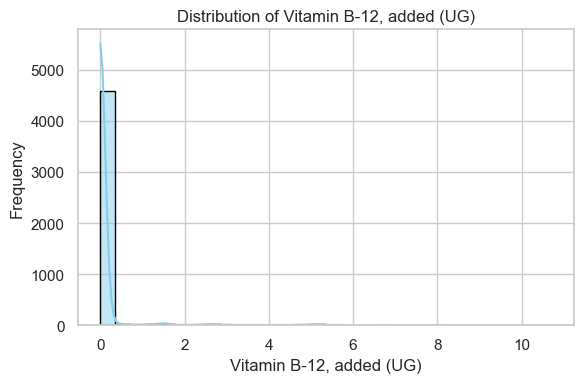

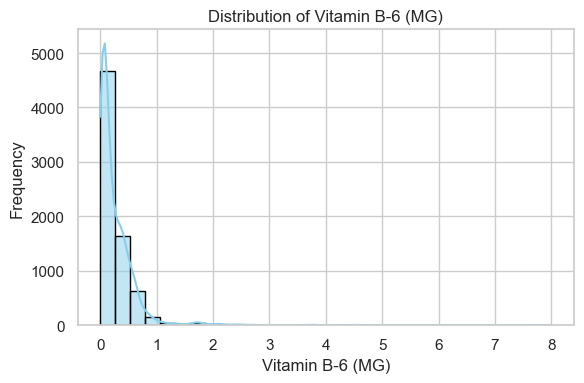

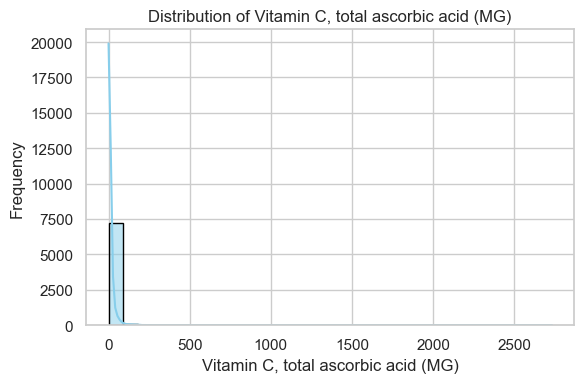

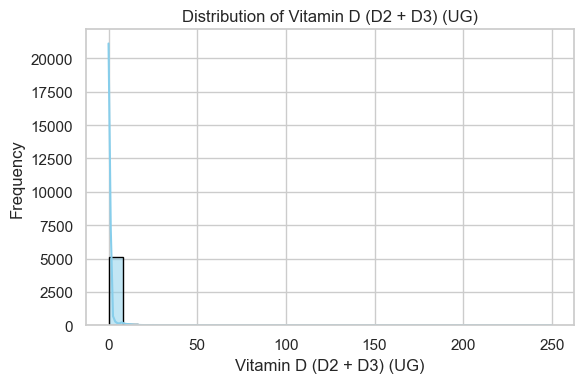

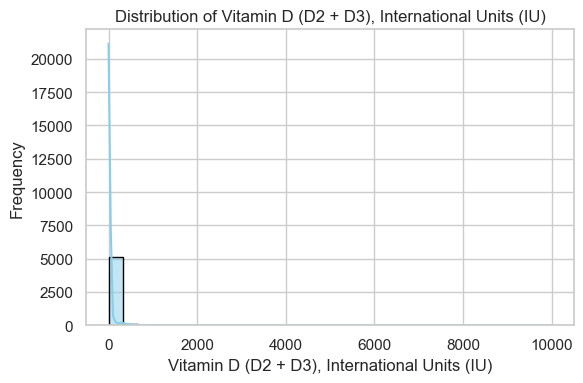

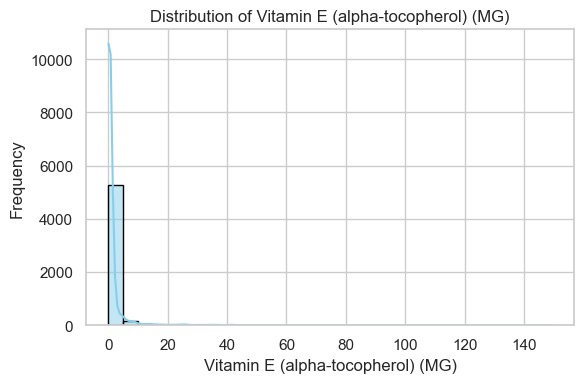

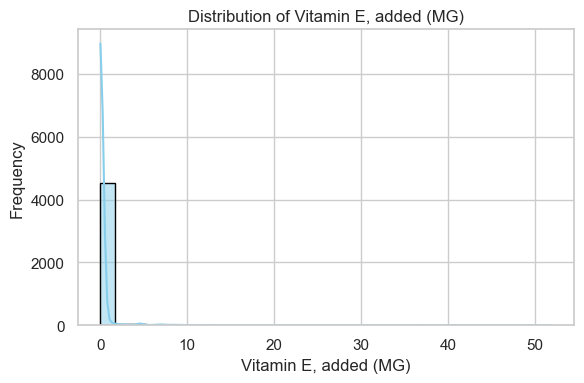

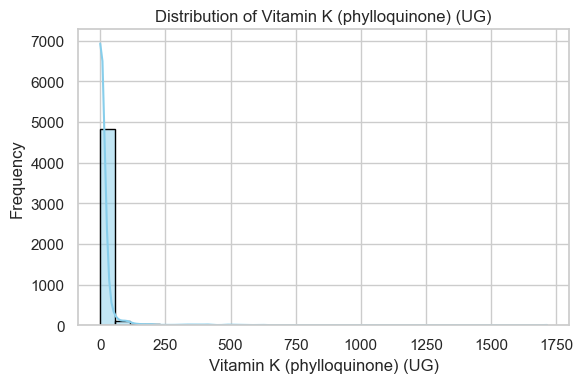

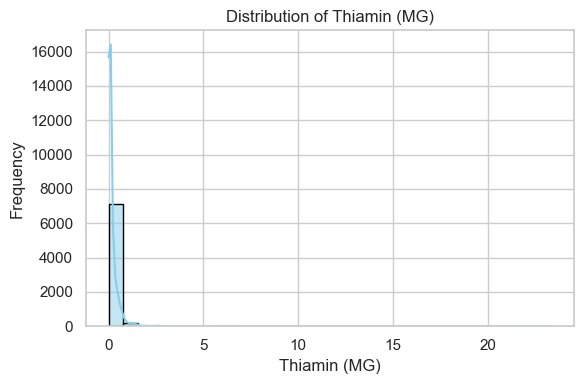

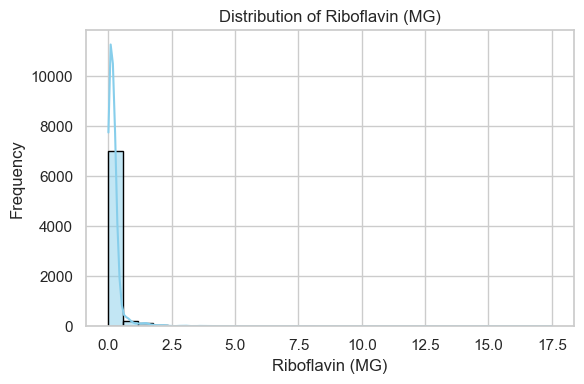

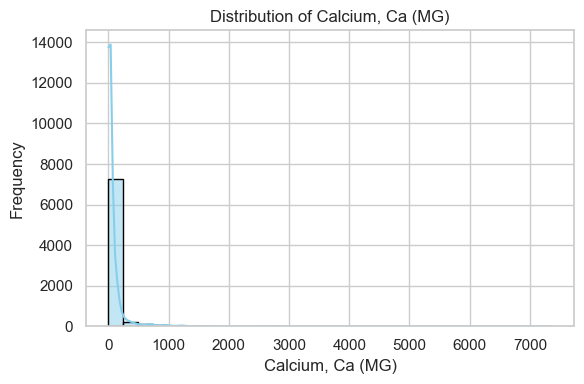

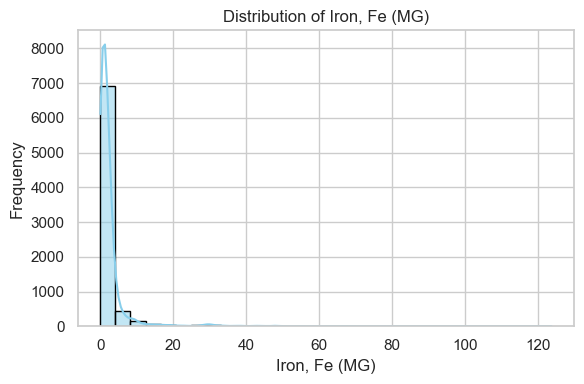

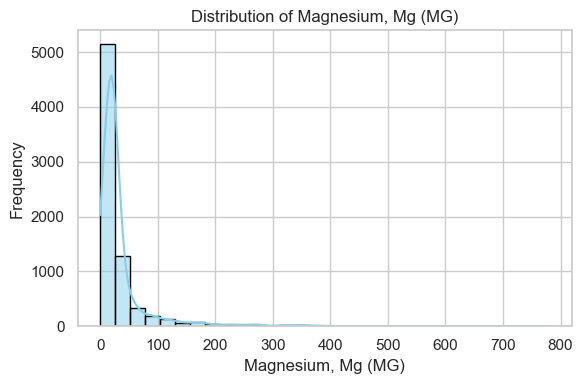

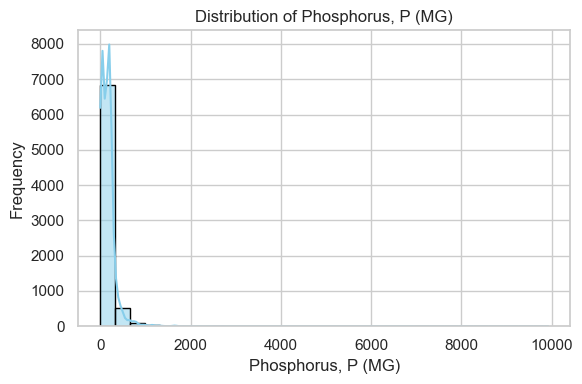

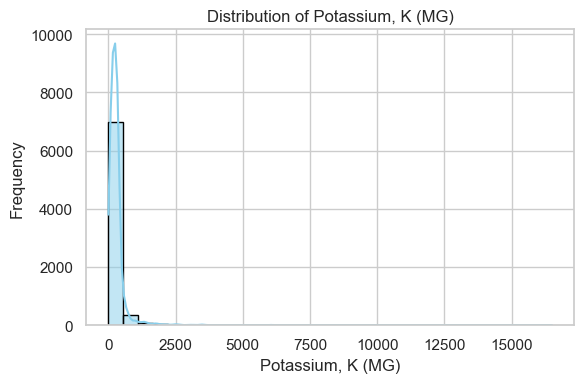

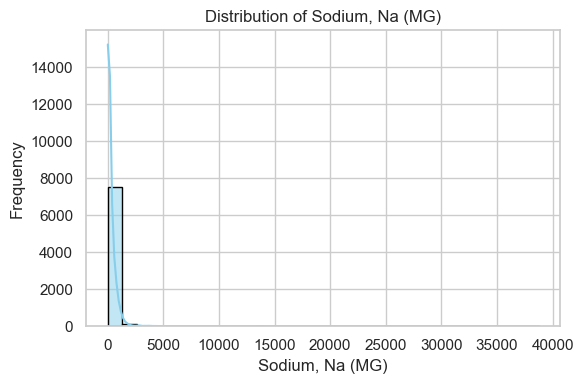

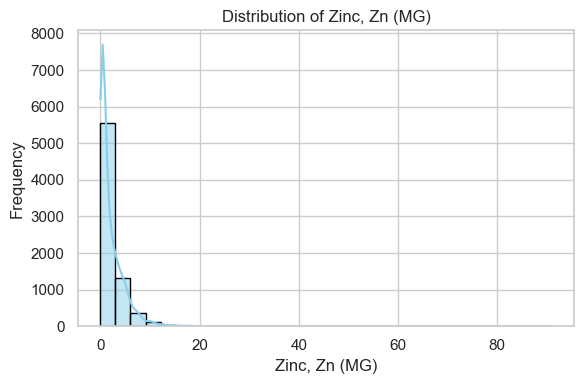

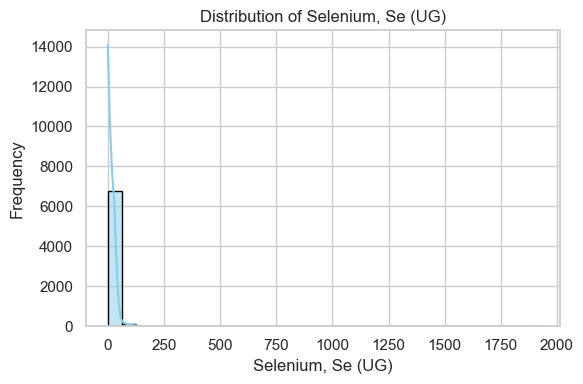

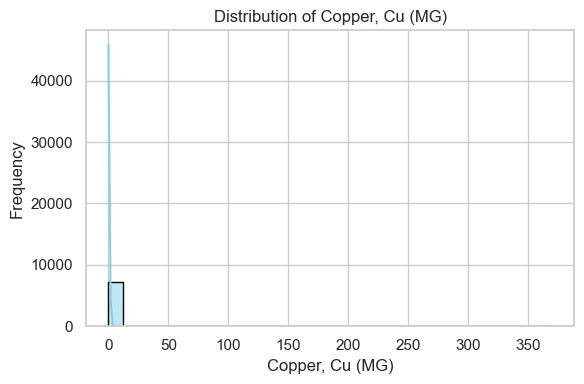

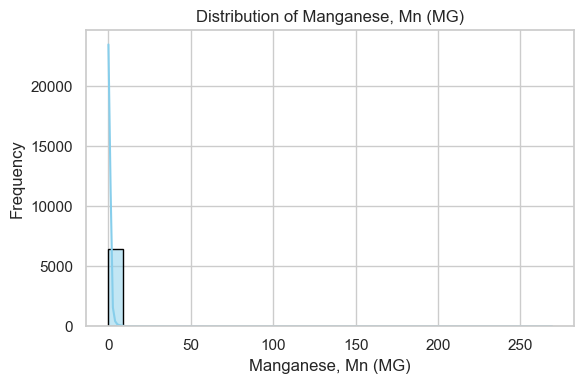

31


In [27]:

nutrient_cols = filtered_df.select_dtypes(include=[np.number]).columns.tolist()

# Set style
sns.set(style="whitegrid")

# Plot histograms for each nutrient column
count = 0
for col in nutrient_cols:
    count+=1
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
print(count)


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Load data
# filtered_df = pd.read_csv("food_data.csv")  # Already loaded in your session

# Copy original
features_df = filtered_df.copy()

# Drop non-numeric columns (e.g., 'Food Name')
non_numeric_cols = features_df.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = features_df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Water (G)' from log transformation
exclude_from_log = ['Water (G)']
log_candidates = [col for col in numeric_cols if col not in exclude_from_log]

# Fill NaNs with small value for safe log1p (or choose an imputation strategy)
features_df[numeric_cols] = features_df[numeric_cols].fillna(0)

# Identify skewed columns (skewness > 1 or < -1)
highly_skewed_cols = [
    col for col in log_candidates
    if abs(skew(features_df[col])) > 1
]

# Apply log1p to skewed features
for col in highly_skewed_cols:
    features_df[col] = np.log1p(features_df[col])

# Now scale everything
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Save to CSV
features_df.to_csv('final_csv.csv', index=False)


In [29]:
# # Save the processed DataFrame to a new CSV file
# features_df.to_csv('final_csv.csv', index=False)

# print("The transformed data has been saved as 'final_csv.csv'.")


In [30]:
import pandas as pd

# Load the saved CSV
final_df = pd.read_csv('final_csv.csv')

# Drop non-numeric columns (like 'Food Name' if it was retained)
numeric_cols = final_df.select_dtypes(include='number').columns

# Check mean and standard deviation for each numeric column
means = final_df[numeric_cols].mean()
stds = final_df[numeric_cols].std()

# Print results
print("Means:\n", means)
print("\nStandard Deviations:\n", stds)


Means:
 Protein (G)                                      2.080014e+00
Carbohydrate, by difference (G)                  1.985897e+00
Sugars, Total (G)                                9.257326e-01
Fiber, total dietary (G)                         6.143366e-01
Total lipid (fat) (G)                            1.755698e+00
Energy (KCAL)                                    5.036411e+00
Energy (kJ)                                      6.451525e+00
Water (G)                                        5.603347e+01
Vitamin A, IU (IU)                               3.093036e+00
Vitamin A, RAE (UG)                              9.296515e-05
Vitamin B-12 (UG)                                1.216595e-06
Vitamin B-12, added (UG)                         6.219158e-08
Vitamin B-6 (MG)                                 2.464011e-04
Vitamin C, total ascorbic acid (MG)              7.356792e-03
Vitamin D (D2 + D3) (UG)                         3.620503e-07
Vitamin D (D2 + D3), International Units (IU)    7.255503e-01


In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Assuming `features_df` is your standardized DataFrame
data = features_df.copy()
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# 1. Variance threshold (very low variance features)
var_thresh = VarianceThreshold(threshold=0.01)  # threshold can be adjusted
var_thresh.fit(data[numeric_cols])
low_variance_cols = [col for col, keep in zip(numeric_cols, var_thresh.get_support()) if not keep]

# 2. High correlation (above 0.95)
corr_matrix = data[numeric_cols].corr().abs()
high_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.95:
            colname = corr_matrix.columns[i]
            high_corr_cols.add(colname)

# 3. PCA-based contribution (optional but insightful)
pca = PCA(n_components=len(numeric_cols))
pca.fit(data[numeric_cols])
feature_contributions = np.abs(pca.components_[0])  # First principal component
least_contributing = [col for col, contrib in sorted(zip(numeric_cols, feature_contributions), key=lambda x: x[1])[:5]]

# Output all findings
print("🔍 Low-variance columns:")
print(low_variance_cols)

print("\n🔁 Highly correlated columns (redundant):")
print(list(high_corr_cols))

print("\n📉 Least important features from PCA (1st component):")
print(least_contributing)


🔍 Low-variance columns:
['Vitamin A, RAE (UG)', 'Vitamin B-12 (UG)', 'Vitamin B-12, added (UG)', 'Vitamin B-6 (MG)', 'Vitamin C, total ascorbic acid (MG)', 'Vitamin D (D2 + D3) (UG)', 'Vitamin E (alpha-tocopherol) (MG)', 'Vitamin E, added (MG)', 'Vitamin K (phylloquinone) (UG)', 'Thiamin (MG)', 'Riboflavin (MG)', 'Iron, Fe (MG)', 'Magnesium, Mg (MG)', 'Zinc, Zn (MG)', 'Selenium, Se (UG)', 'Copper, Cu (MG)', 'Manganese, Mn (MG)']

🔁 Highly correlated columns (redundant):
['Energy (kJ)']

📉 Least important features from PCA (1st component):
['Vitamin B-12, added (UG)', 'Vitamin D (D2 + D3) (UG)', 'Vitamin B-12 (UG)', 'Vitamin K (phylloquinone) (UG)', 'Selenium, Se (UG)']


In [32]:
for column in final_df.columns:
    print(column)

Food Name
Protein (G)
Carbohydrate, by difference (G)
Sugars, Total (G)
Fiber, total dietary (G)
Total lipid (fat) (G)
Energy (KCAL)
Energy (kJ)
Water (G)
Vitamin A, IU (IU)
Vitamin A, RAE (UG)
Vitamin B-12 (UG)
Vitamin B-12, added (UG)
Vitamin B-6 (MG)
Vitamin C, total ascorbic acid (MG)
Vitamin D (D2 + D3) (UG)
Vitamin D (D2 + D3), International Units (IU)
Vitamin E (alpha-tocopherol) (MG)
Vitamin E, added (MG)
Vitamin K (phylloquinone) (UG)
Thiamin (MG)
Riboflavin (MG)
Calcium, Ca (MG)
Iron, Fe (MG)
Magnesium, Mg (MG)
Phosphorus, P (MG)
Potassium, K (MG)
Sodium, Na (MG)
Zinc, Zn (MG)
Selenium, Se (UG)
Copper, Cu (MG)
Manganese, Mn (MG)


In [33]:
df_after_drop = df.drop(columns=['Energy (kJ)'])

print("DataFrame after dropping 'Energy (kJ)' column:")
print(df_after_drop.head().to_markdown(index=False, numalign="left", stralign="left"))

print(df_after_drop.info())

DataFrame after dropping 'Energy (kJ)' column:
| Food Name                                             | Alanine (G)   | Alcohol, ethyl (G)   | Arginine (G)   | Ash (G)   | Aspartic acid (G)   | Beta-sitosterol (MG)   | Betaine (MG)   | Caffeine (MG)   | Calcium, Ca (MG)   | Campesterol (MG)   | Carbohydrate, by difference (G)   | Carotene, alpha (UG)   | Carotene, beta (UG)   | Cholesterol (MG)   | Choline, total (MG)   | Copper, Cu (MG)   | Cryptoxanthin, beta (UG)   | Cystine (G)   | Energy (KCAL)   | Fatty acids, total monounsaturated (G)   | Fatty acids, total polyunsaturated (G)   | Fatty acids, total saturated (G)   | Fatty acids, total trans (G)   | Fatty acids, total trans-monoenoic (G)   | Fatty acids, total trans-polyenoic (G)   | Fiber, total dietary (G)   | Fluoride, F (UG)   | Folate, DFE (UG)   | Folate, food (UG)   | Folate, total (UG)   | Folic acid (UG)   | Fructose (G)   | Galactose (G)   | Glucose (G)   | Glutamic acid (G)   | Glycine (G)   | Histidine (G)   | Hydro

In [34]:
correlation_matrix = final_df[numeric_cols].corr().round(2).values
# print(correlation_matrix)
with open('data.txt', 'w') as f:
    for row in correlation_matrix:
        f.write(str(list(row)))
        f.write('\n\n')
        print(list(row))


[np.float64(1.0), np.float64(-0.39), np.float64(-0.38), np.float64(-0.13), np.float64(0.46), np.float64(0.45), np.float64(0.45), np.float64(-0.21), np.float64(-0.14), np.float64(0.03), np.float64(0.23), np.float64(0.01), np.float64(0.34), np.float64(-0.13), np.float64(0.01), np.float64(0.24), np.float64(-0.07), np.float64(0.02), np.float64(-0.07), np.float64(0.18), np.float64(0.26), np.float64(0.1), np.float64(0.2), np.float64(0.26), np.float64(0.64), np.float64(0.41), np.float64(0.11), np.float64(0.46), np.float64(0.37), np.float64(0.03), np.float64(0.04)]
[np.float64(-0.39), np.float64(1.0), np.float64(0.63), np.float64(0.67), np.float64(-0.18), np.float64(0.21), np.float64(0.21), np.float64(-0.49), np.float64(0.15), np.float64(-0.01), np.float64(-0.19), np.float64(0.14), np.float64(-0.07), np.float64(0.11), np.float64(-0.03), np.float64(-0.21), np.float64(0.05), np.float64(0.08), np.float64(0.04), np.float64(0.19), np.float64(0.06), np.float64(0.29), np.float64(0.19), np.float64(0.3

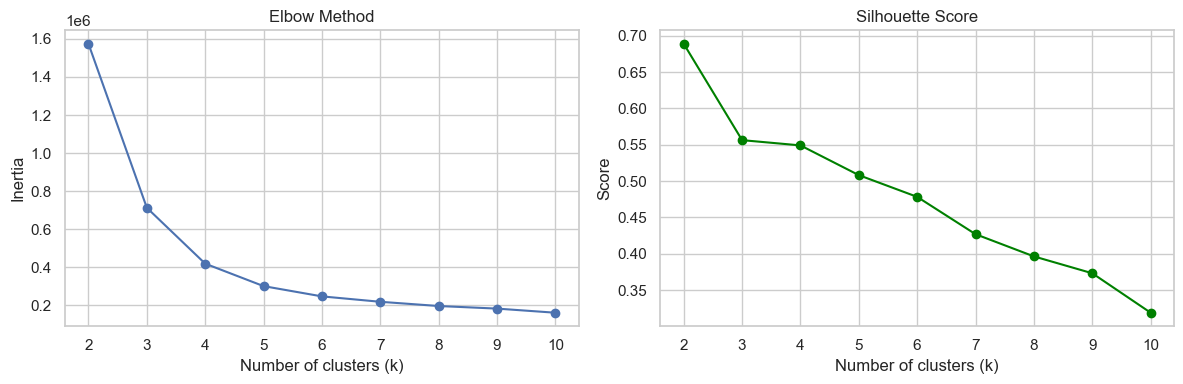

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare Data ---
df = pd.read_csv('final_csv.csv')
food_names = df['Food Name']
numeric_df = df.drop(columns=['Food Name'])  # Only nutrient features

# --- Step 2: Optional - Try Different Values of K ---
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(numeric_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(numeric_df, labels))

# Plot Elbow Curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()



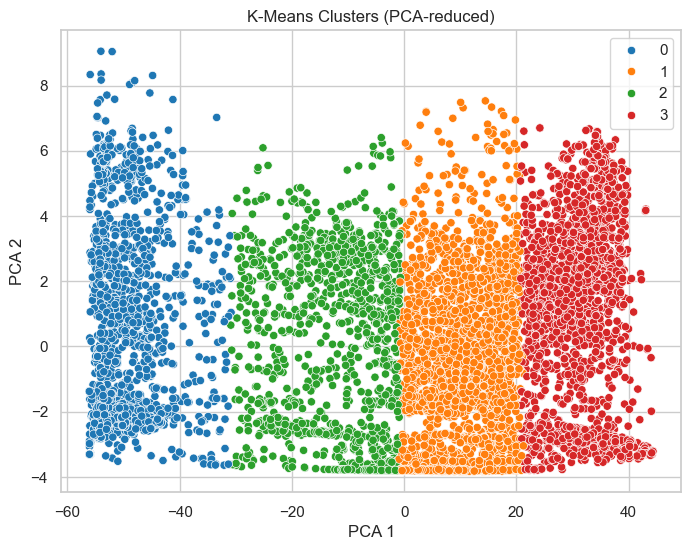

In [36]:
# --- Step 3: Final KMeans Training ---
optimal_k = 4  # <- Update this after elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(numeric_df)

# --- Step 4: Optional - Visualize with PCA (2D) ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='tab10')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# # --- Step 5: Recommend Similar Foods (Simple Lookup) ---
# def recommend_similar_foods(selected_food, top_n=5):
#     selected_cluster = df[df['food_name'] == selected_food]['cluster'].values[0]
#     recommendations = df[(df['cluster'] == selected_cluster) & (df['food_name'] != selected_food)]
#     return recommendations['food_name'].sample(n=min(top_n, len(recommendations)))

# # Example:
# print(recommend_similar_foods("Almonds"))


Silhouette Score (k=4): 0.242


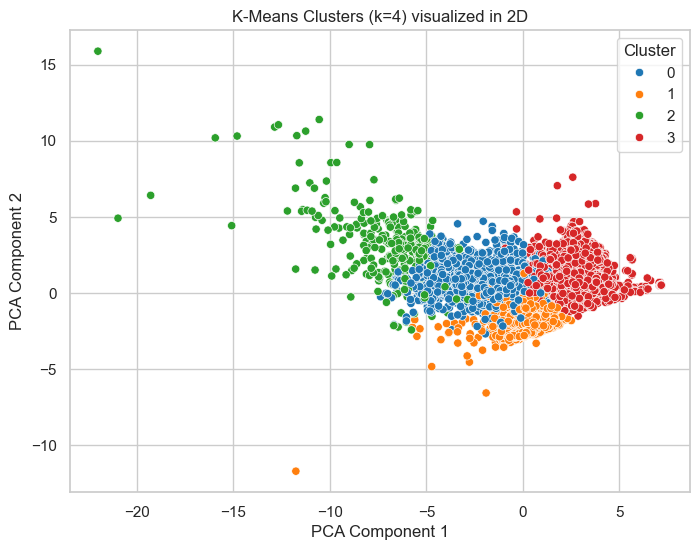

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare Data ---
food_names = df['Food Name']
X = df.drop(columns=['Food Name'])  # Nutrient features

# --- Step 2: (Re)Scale if not already standardized ---
# Skip this if you've already standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Train KMeans in full feature space ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

# --- Step 4: Evaluate cluster quality ---
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score (k={optimal_k}): {sil_score:.3f}')

# --- Step 5: Visualize with PCA (2D projection only) ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title(f'K-Means Clusters (k={optimal_k}) visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


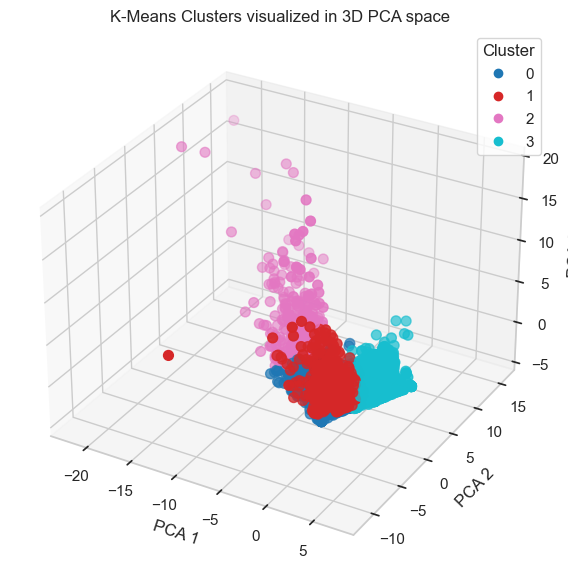

In [38]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2],
                     c=clusters, cmap='tab10', s=50)
ax.set_title("K-Means Clusters visualized in 3D PCA space")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


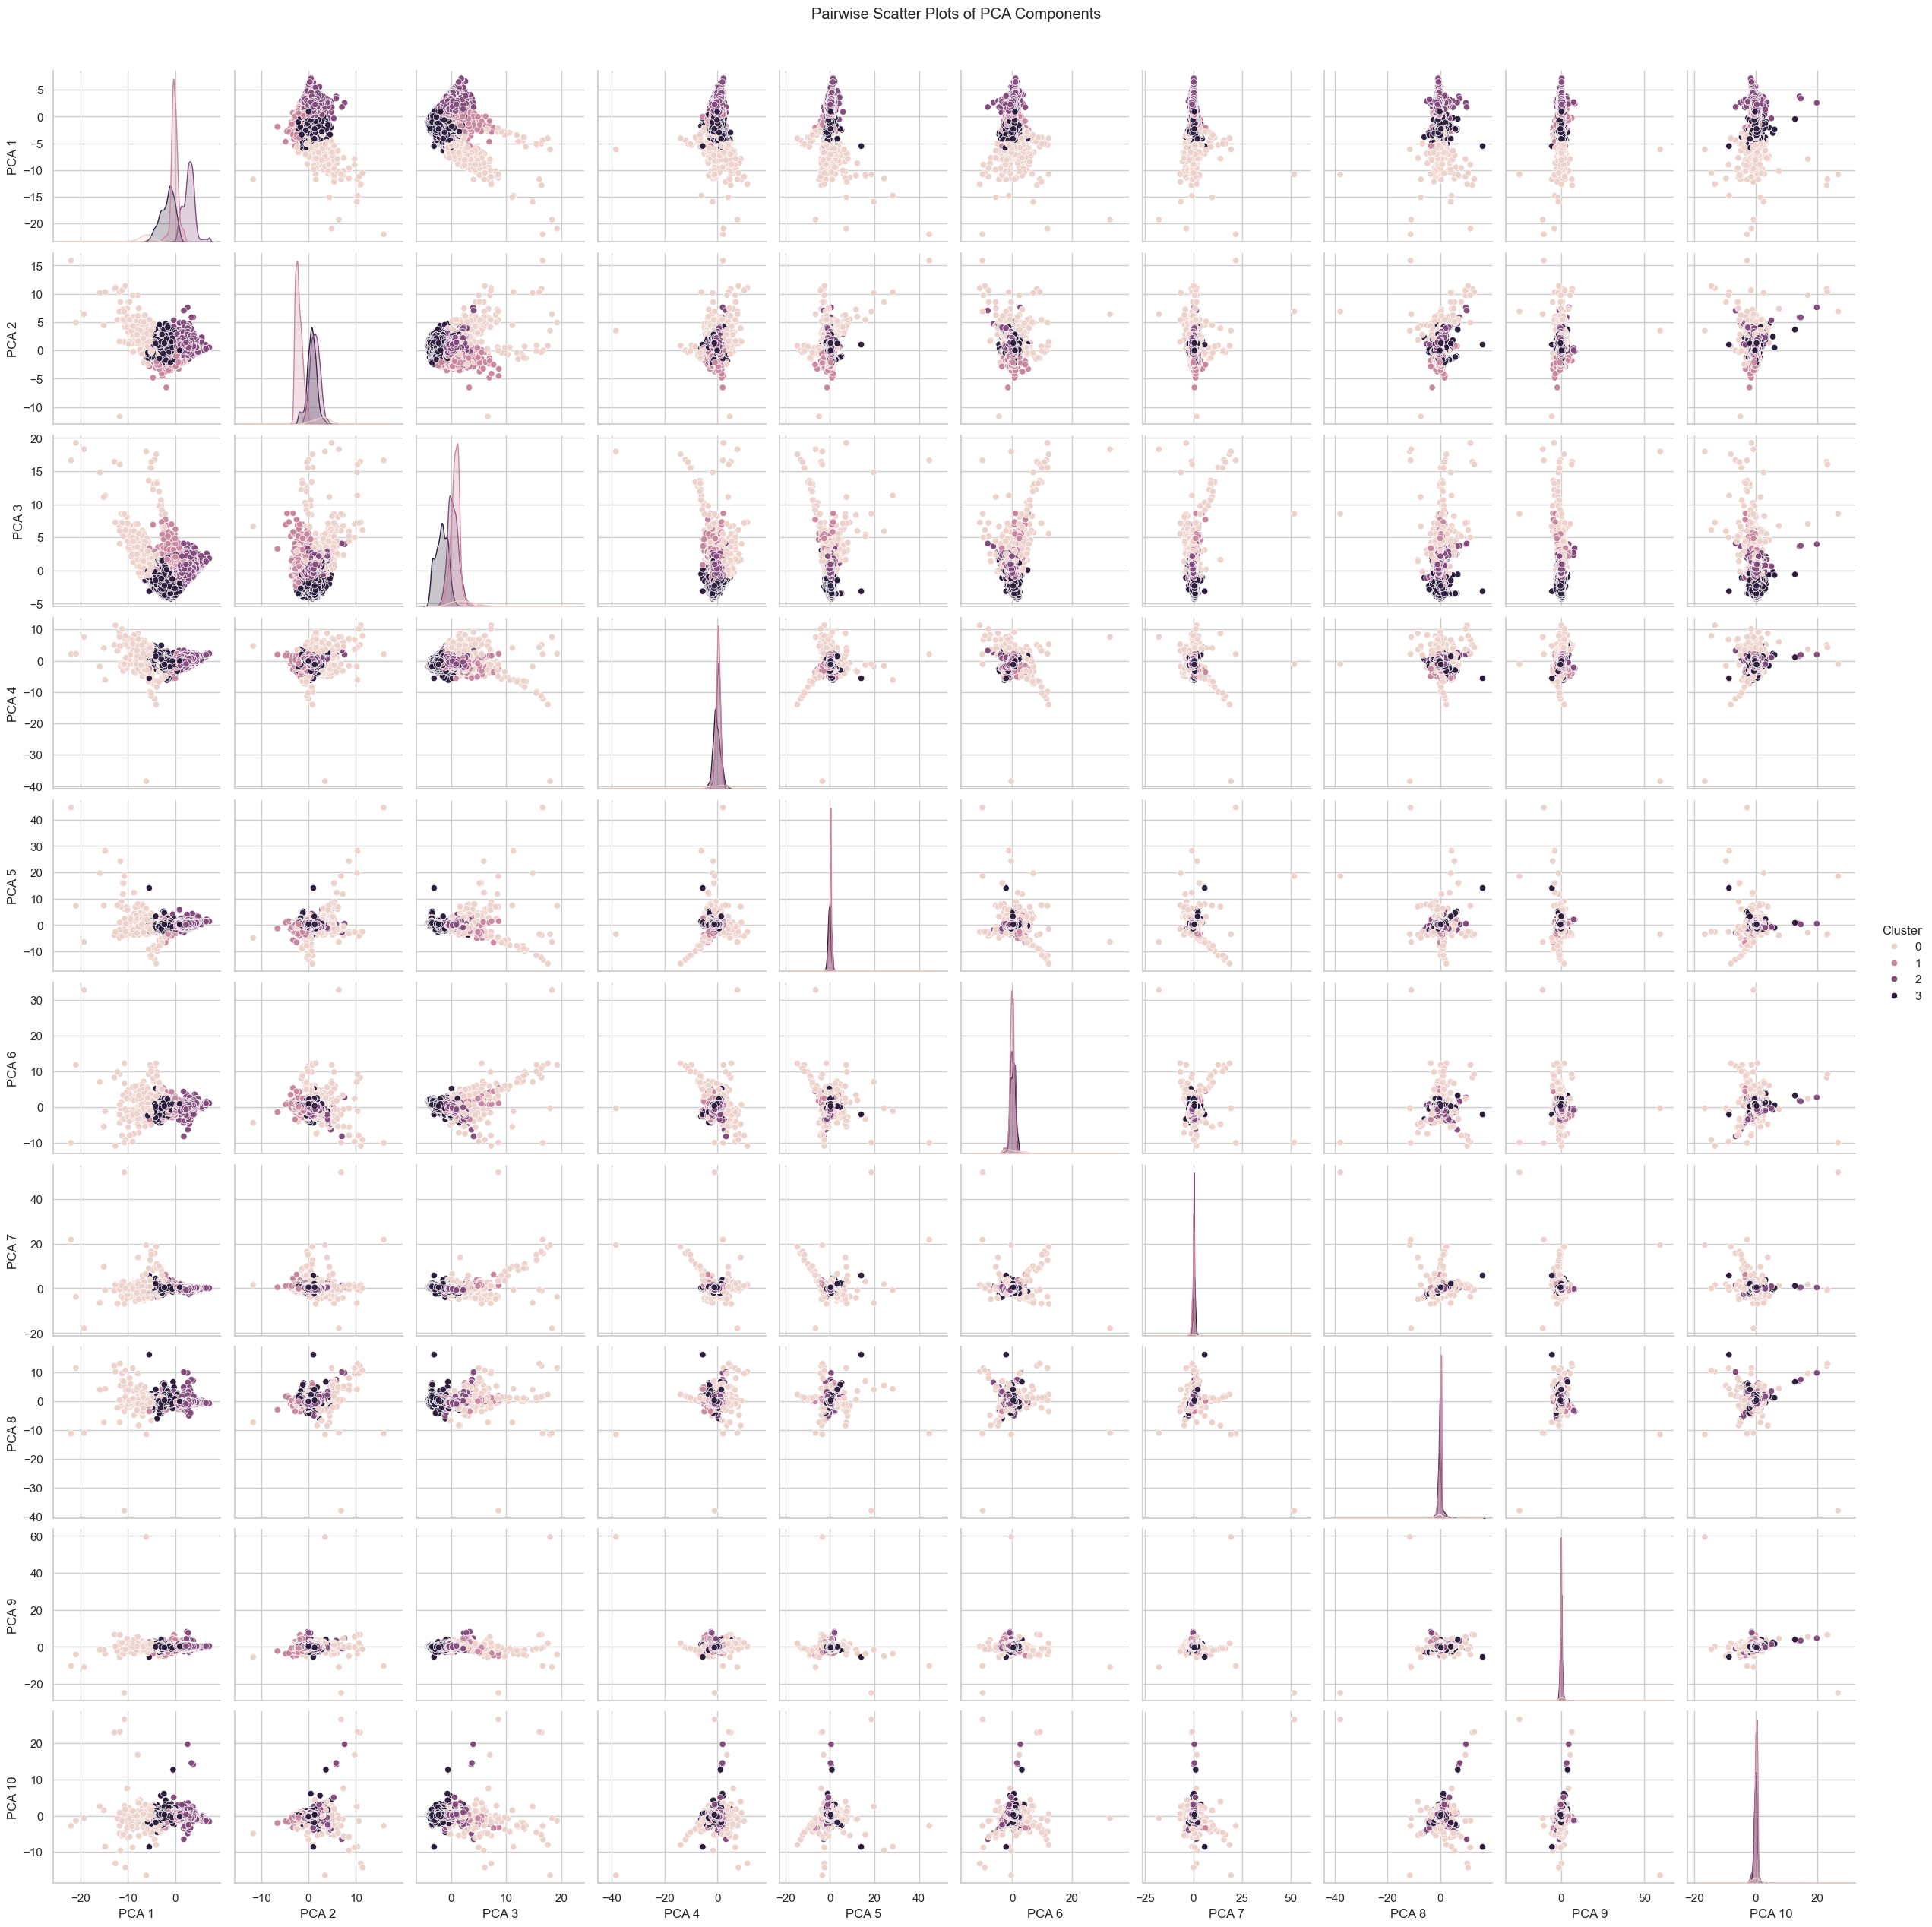

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming X is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=min(10, X_scaled.shape[1])) # Consider top N components
pca_result = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Assuming 4 clusters
clusters = kmeans.fit_predict(pca_result)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA {i+1}' for i in range(pca_result.shape[1])])
pca_df['Cluster'] = clusters

sns.pairplot(pca_df, hue='Cluster', diag_kind='kde') # 'kde' for kernel density estimates on the diagonal
plt.suptitle("Pairwise Scatter Plots of PCA Components", y=1.02)
plt.show()

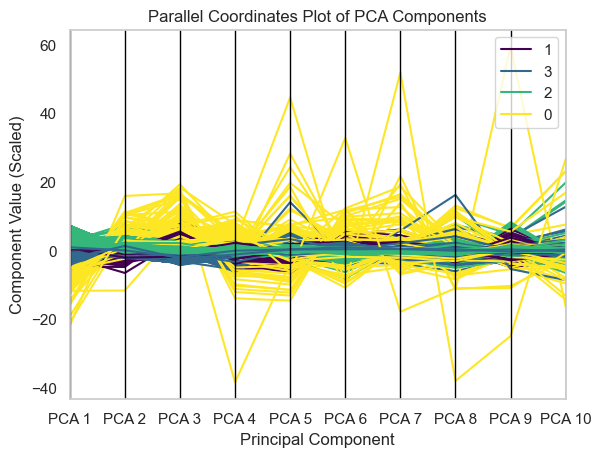

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming X is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=min(10, X_scaled.shape[1])) # Consider top N components
pca_result = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Assuming 4 clusters
clusters = kmeans.fit_predict(pca_result)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA {i+1}' for i in range(pca_result.shape[1])])
pca_df['Cluster'] = clusters

parallel_coordinates(pca_df, class_column='Cluster', colormap='viridis')
plt.title("Parallel Coordinates Plot of PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Component Value (Scaled)")
plt.show()

In [41]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your data
data = pd.read_csv('final_csv.csv')  # Replace 'food_nutrients.csv' with your actual file name

# Separate out the food names and nutrient data
food_names = data['Food Name']
nutrient_data = data.drop('Food Name', axis=1)

# Handle missing values (important for DBSCAN)
nutrient_data = nutrient_data.fillna(0)  # Or use a more sophisticated imputation method if appropriate

# Scale the nutrient data (DBSCAN is distance-based, so scaling is crucial)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutrient_data)

# Apply DBSCAN
# You'll need to tune these parameters (eps and min_samples) for your data
# A good starting point is to experiment with different values of eps
# and min_samples.  min_samples should be related to the intrinsic
# dimensionality of your data.
dbscan = DBSCAN(eps=0.001, min_samples=10)  # These are example values, adjust them!
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels back to the original dataframe
data['cluster'] = clusters

# Analyze the clusters
print("Cluster Analysis:")
print(data['cluster'].value_counts())

# Check for noisy points (cluster label -1)
noisy_points = data[data['cluster'] == -1]
print(f"\nNumber of noisy points: {len(noisy_points)}")

if (len(data['cluster'].unique()) > 1 and len(noisy_points) < len(data)/2):
  # Calculate Silhouette Score (if there are more than 1 clusters)
  silhouette_avg = silhouette_score(scaled_data, clusters)
  print(f"\nSilhouette Score: {silhouette_avg:.3f}")
else:
  print("\nSilhouette Score is not calculated as there are less than 2 clusters or too many noisy points.")
  print("Consider adjusting DBSCAN parameters.")

# Function to get food recommendations, corrected to handle empty cluster and noisy data


Cluster Analysis:
cluster
-1    7793
Name: count, dtype: int64

Number of noisy points: 7793

Silhouette Score is not calculated as there are less than 2 clusters or too many noisy points.
Consider adjusting DBSCAN parameters.


Loading and preprocessing data...
Data shape: (7793, 31)

Generating k-distance graph to estimate eps...


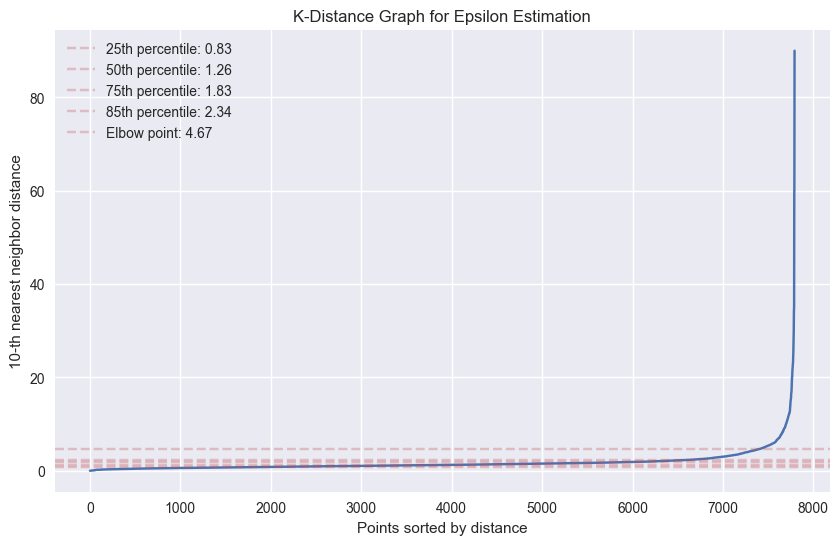


Suggested eps values based on k-distance graph:
                    Value
25th percentile  0.828906
50th percentile  1.256244
75th percentile  1.831011
85th percentile  2.337291
Elbow point      4.670360

Evaluating parameter combinations...
      eps  min_samples  n_clusters  n_noise noise_ratio
0   0.829            5         107     4356       55.9%
1   0.829           10          37     5237       67.2%
5   1.789            5          26     1144       14.7%
2   0.829           15          16     5734       73.6%
3   0.829           20          13     5922       76.0%
15  3.710            5          12      347        4.5%
6   1.789           10          11     1382       17.7%
10  2.750            5          11      586        7.5%
4   0.829           25          10     6133       78.7%
7   1.789           15           6     1590       20.4%
8   1.789           20           4     1732       22.2%
9   1.789           25           4     1841       23.6%
16  3.710           10       

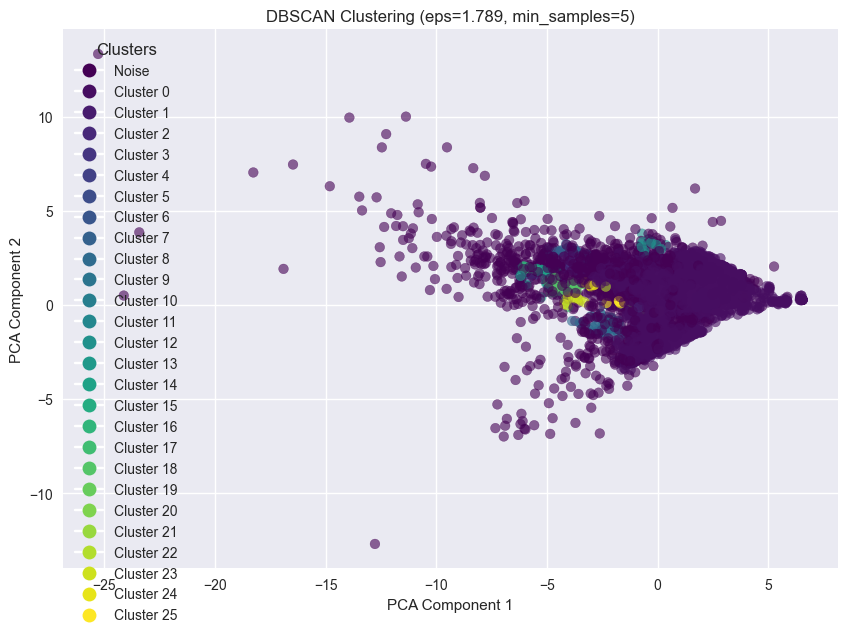

Cluster distribution:
     Count
-1    1144
 0    6376
 1       6
 2       5
 3      24
 4       4
 5       7
 6       5
 7      14
 8      50
 9       6
 10      5
 11      5
 12     13
 13      7
 14     23
 15     13
 16      9
 17      6
 18     21
 19      7
 20     13
 21      7
 22      5
 23      8
 24      5
 25      5

RECOMMENDED PARAMETERS:
eps: 1.789
min_samples: 5
Expected clusters: 26
Noise ratio: 14.7%

If results aren't satisfactory, try:
- Expanding the eps range (try higher values if getting too much noise)
- Trying different min_samples values (lower values for more clusters)
- Using different preprocessing (feature selection or different scaling)


In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Optional: Cleaner output formatting
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')

## 1. Load and Prepare Data
print("Loading and preprocessing data...")
data = pd.read_csv('final_csv.csv')
food_names = data['Food Name']
nutrient_data = data.drop('Food Name', axis=1).fillna(0)

# Standardize the data (crucial for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutrient_data)
print(f"Data shape: {scaled_data.shape}")

## 2. Find Optimal Epsilon using k-distance Graph
def plot_k_distance(data, k=10):
    """Plot k-distance graph to help determine eps"""
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    k_distances = np.sort(distances[:, k-1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-Distance Graph for Epsilon Estimation')
    plt.grid(True)
    
    # Calculate potential eps values
    eps_candidates = {
        '25th percentile': np.percentile(k_distances, 25),
        '50th percentile': np.percentile(k_distances, 50),
        '75th percentile': np.percentile(k_distances, 75),
        '85th percentile': np.percentile(k_distances, 85),
        'Elbow point': k_distances[int(len(k_distances)*0.95)]
    }
    
    for name, value in eps_candidates.items():
        plt.axhline(y=value, color='r', linestyle='--', alpha=0.3, label=f'{name}: {value:.2f}')
    
    plt.legend()
    plt.show()
    
    return eps_candidates

print("\nGenerating k-distance graph to estimate eps...")
eps_suggestions = plot_k_distance(scaled_data)
print("\nSuggested eps values based on k-distance graph:")
print(pd.DataFrame.from_dict(eps_suggestions, orient='index', columns=['Value']))

## 3. Parameter Grid Search
def evaluate_dbscan_params(data, eps_values, min_samples_values):
    """Evaluate different parameter combinations"""
    results = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Calculate metrics
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            noise_ratio = n_noise / len(labels)
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': f"{noise_ratio:.1%}"
            })
    
    return pd.DataFrame(results)

# Create parameter ranges based on eps suggestions
eps_values = np.linspace(
    min(eps_suggestions.values()),
    max(eps_suggestions.values()),
    5
).round(3)

min_samples_values = [5, 10, 15, 20, 25]

print("\nEvaluating parameter combinations...")
param_results = evaluate_dbscan_params(scaled_data, eps_values, min_samples_values)
print(param_results.sort_values(['n_clusters', 'noise_ratio'], ascending=[False, True]))

## 4. Visualize Cluster Results
def visualize_best_params(data, best_eps, best_min_samples):
    """Visualize the clustering results with the best parameters"""
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels = dbscan.fit_predict(data)
    
    # PCA for visualization (2D)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    
    # Create legend for clusters
    unique_labels = np.unique(labels)
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=scatter.cmap(scatter.norm(label)),
                          markersize=10) for label in unique_labels]
    legend_labels = [f'Cluster {label}' if label != -1 else 'Noise' for label in unique_labels]
    plt.legend(handles, legend_labels, title='Clusters')
    
    plt.show()
    
    # Print cluster statistics
    cluster_stats = pd.Series(labels).value_counts().sort_index()
    print("Cluster distribution:")
    print(cluster_stats.to_frame('Count'))

# Try parameters with most clusters and reasonable noise
best_params = param_results[
    (param_results['n_clusters'] > 1) & 
    (param_results['noise_ratio'].str.replace('%', '').astype(float) < 50)
].sort_values('n_clusters', ascending=False).iloc[0]

print("\nVisualizing best parameters found...")
visualize_best_params(scaled_data, best_params['eps'], best_params['min_samples'])

## 5. Final Recommendation
print("\nRECOMMENDED PARAMETERS:")
print(f"eps: {best_params['eps']}")
print(f"min_samples: {best_params['min_samples']}")
print(f"Expected clusters: {best_params['n_clusters']}")
print(f"Noise ratio: {best_params['noise_ratio']}")

print("\nIf results aren't satisfactory, try:")
print("- Expanding the eps range (try higher values if getting too much noise)")
print("- Trying different min_samples values (lower values for more clusters)")
print("- Using different preprocessing (feature selection or different scaling)")


In [43]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the data
data = pd.read_csv('final_csv.csv')
food_names = data['Food Name']
nutrient_data = data.drop('Food Name', axis=1).fillna(0)

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutrient_data)

# Train DBSCAN
eps = 1.789
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_data)

# Attach cluster labels to original data
data['Cluster'] = labels
data['Total Nutrients'] = nutrient_data.sum(axis=1)

# Exclude noise (-1)
clustered_data = data[data['Cluster'] != -1]

# Show 5 top products from each cluster (by total nutrients)
top_products = clustered_data.sort_values(['Cluster', 'Total Nutrients'], ascending=[True, False])
top_5_each_cluster = top_products.groupby('Cluster').head(5)

print("Top 5 products per cluster based on total nutrients:\n")
for cluster_id, group in top_5_each_cluster.groupby('Cluster'):
    print(f"\n🟢 Cluster {cluster_id}:")
    print(group[['Food Name', 'Total Nutrients']].to_string(index=False))

# Save model components for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(dbscan, 'dbscan_model.pkl')


Top 5 products per cluster based on total nutrients:


🟢 Cluster 0:
                                                                              Food Name  Total Nutrients
   Infant formula, MEAD JOHNSON, ENFAMIL, Premature, 20 calories ready-to-feed Low iron       116.166907
        Beverages, coconut milk, sweetened, fortified with calcium, vitamins A, B12, D2       116.156891
Infant formula, MEAD JOHNSON, ENFAMIL, Premature, with iron, 20 calories, ready-to-feed       116.038284
                                                         SILK Plus Omega-3 DHA, soymilk       115.982180
   Infant formula, MEAD JOHNSON, ENFAMIL, Premature, 24 calories ready-to-feed Low iron       115.915819

🟢 Cluster 1:
               Food Name  Total Nutrients
       Fish oil, sardine        25.465141
             Fat, turkey        25.110968
            Fat, chicken        25.110768
Animal fat, bacon grease        24.406365
                    Lard        24.292432

🟢 Cluster 2:
                      

['dbscan_model.pkl']

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
import joblib

# Load data
data = pd.read_csv('final_csv.csv')
food_names = data['Food Name']
nutrient_data = data.drop('Food Name', axis=1).fillna(0)

# Scale nutrient data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutrient_data)

# Train DBSCAN model
eps = 1.789
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_data)

# Add labels to data
data['Cluster'] = labels
data['Scaled Nutrients'] = list(scaled_data)

# Save model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(dbscan, 'dbscan_model.pkl')

# 1. Print number of items per cluster (excluding noise)
print("📊 Number of items in each cluster (excluding noise):\n")
cluster_counts = data[data['Cluster'] != -1]['Cluster'].value_counts().sort_index()
print(cluster_counts)

# 2. Function: Recommend top 5 alternatives for a given food
def recommend_similar_food(food_name, data):
    if food_name not in data['Food Name'].values:
        print(f"❌ Food '{food_name}' not found in the dataset.")
        return

    item = data[data['Food Name'] == food_name].iloc[0]
    cluster = item['Cluster']

    if cluster == -1:
        print(f"⚠️ The selected food '{food_name}' is marked as noise (not in any cluster).")
        return

    # Get other items in same cluster
    cluster_items = data[(data['Cluster'] == cluster) & (data['Food Name'] != food_name)]

    if cluster_items.empty:
        print(f"⚠️ No other items found in the same cluster as '{food_name}'.")
        return

    # Compute distance to all items in the same cluster
    item_vec = np.array(item['Scaled Nutrients']).reshape(1, -1)
    others = np.stack(cluster_items['Scaled Nutrients'].values)
    distances = euclidean_distances(item_vec, others).flatten()

    # Add distances to cluster_items and get top 5
    cluster_items = cluster_items.copy()
    cluster_items['Distance'] = distances
    recommendations = cluster_items.sort_values('Distance').head(5)

    print(f"\n🔁 Recommended alternatives to '{food_name}' (from Cluster {cluster}):\n")
    print(recommendations[['Food Name', 'Distance']].to_string(index=False))

# 3. Call recommendation function with a sample
sample_food = "Alcoholic Beverage, wine, table, red, Zinfandel"  # 🔁 Change this to any valid food name from your dataset
recommend_similar_food(sample_food, data)


📊 Number of items in each cluster (excluding noise):

Cluster
0     6376
1        6
2        5
3       24
4        4
5        7
6        5
7       14
8       50
9        6
10       5
11       5
12      13
13       7
14      23
15      13
16       9
17       6
18      21
19       7
20      13
21       7
22       5
23       8
24       5
25       5
Name: count, dtype: int64

🔁 Recommended alternatives to 'Alcoholic Beverage, wine, table, red, Zinfandel' (from Cluster 0):

                                         Food Name  Distance
    Alcoholic Beverage, wine, table, red, Mouvedre  0.036681
     Alcoholic Beverage, wine, table, red, Barbera  0.052667
  Alcoholic Beverage, wine, table, red, Sangiovese  0.053210
Alcoholic Beverage, wine, table, red, Petite Sirah  0.058649
      Alcoholic Beverage, wine, table, red, Claret  0.086592


📈 Training autoencoder...
Epoch 0: Loss = 0.6821
Epoch 10: Loss = 0.1389
Epoch 20: Loss = 0.0910
Epoch 30: Loss = 0.0787
Epoch 40: Loss = 0.0696


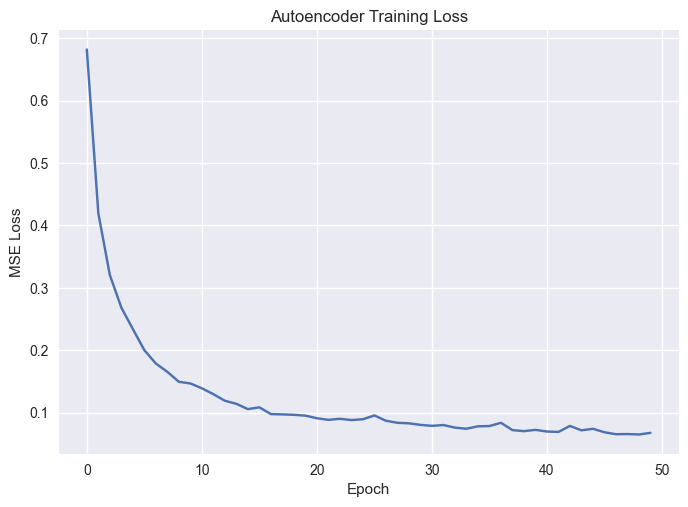

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# 1. Load and preprocess data
data = pd.read_csv("final_csv.csv")
food_names = data["Food Name"].values
nutrient_data = data.drop("Food Name", axis=1).fillna(0)

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutrient_data)

# Convert to Torch tensors
X = torch.tensor(scaled_data, dtype=torch.float32)

# 2. Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, embedding_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, embedding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Model parameters
input_dim = X.shape[1]
embedding_dim = 10
model = Autoencoder(input_dim, embedding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Train Autoencoder
loader = DataLoader(TensorDataset(X), batch_size=32, shuffle=True)
epochs = 50
losses = []

print("📈 Training autoencoder...")
for epoch in range(epochs):
    total_loss = 0
    for batch in loader:
        x_batch = batch[0]
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, x_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss / len(loader))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {losses[-1]:.4f}")

# Plot training loss
plt.plot(losses)
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# 4. Extract embeddings
with torch.no_grad():
    embeddings = model.encoder(X).numpy()

In [47]:
def recommend_similar_food_autoencoder(food_name, food_names, embeddings, top_n=5):
    if food_name not in food_names:
        print(f"❌ Food '{food_name}' not found.")
        return

    index = np.where(food_names == food_name)[0][0]
    target_embedding = embeddings[index].reshape(1, -1)
    similarity = cosine_similarity(target_embedding, embeddings).flatten()

    # Sort by similarity (excluding itself)
    similar_indices = similarity.argsort()[::-1][1:top_n+1]
    similar_foods = [(food_names[i], similarity[i]) for i in similar_indices]

    print(f"\n🔁 Recommended alternatives to '{food_name}':\n")
    for name, score in similar_foods:
        print(f"{name} (similarity: {score:.3f})")

# 6. Try it!
sample = "APPLEBEE'S, fish, hand battered"  # Replace with any valid food
recommend_similar_food_autoencoder(sample, food_names, embeddings)




🔁 Recommended alternatives to 'APPLEBEE'S, fish, hand battered':

POPEYES, Spicy Chicken Strips, analyzed 2006 (similarity: 0.982)
DENNY'S, fish fillet, battered or breaded, fried (similarity: 0.982)
POPEYES, Mild Chicken Strips, analyzed 2006 (similarity: 0.981)
WENDY'S, Chicken Nuggets (similarity: 0.975)
CRACKER BARREL, chicken tenderloin platter, fried (similarity: 0.973)


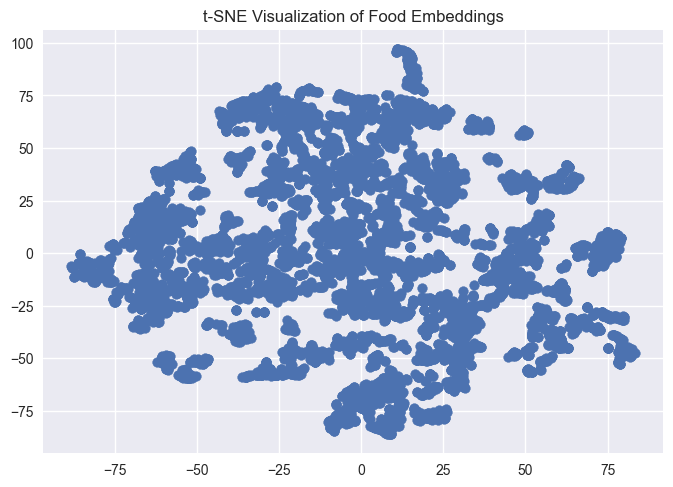

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(embeddings)

plt.scatter(reduced[:,0], reduced[:,1])
plt.title("t-SNE Visualization of Food Embeddings")
plt.grid(True)
plt.show()


In [49]:
# Replace inf/-inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop or fill NaNs
data.fillna(0.0, inplace=True)


In [50]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


ValueError: could not convert string to float: "APPLEBEE'S, 9 oz house sirloin steak"

In [ ]:
# Check for NaNs or infinite values



NaNs in data: 26824
Infs in data: 0


In [ ]:
# Load preprocessed data
filtered_df = pd.read_csv("final_csv.csv")


data = filtered_df.drop(columns=["Food Name"], errors='ignore')
# print(data.head())
print("NaNs in data:", np.isnan(data).sum().sum())
print("Infs in data:", np.isinf(data).sum().sum())

NaNs in data: 0
Infs in data: 0


Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0898 - val_loss: 0.0495
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0353 - val_loss: 0.0152
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0113
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - val_loss: 0.0074
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

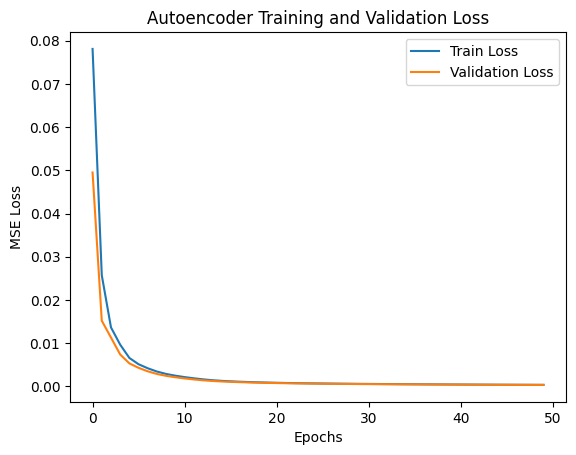

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load preprocessed data
filtered_df = pd.read_csv("final_csv.csv")


data = filtered_df.drop(columns=["Food Name"], errors='ignore')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Train-test split
X_train, X_val = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 20

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val, X_val),
    verbose=1
)

# Encode the input for clustering
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(data_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(encoded_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(encoded_data)

# Autoencoder reconstruction
X_pred = autoencoder.predict(X_val)
mae = mean_absolute_error(X_val, X_pred)
rmse = np.sqrt(mean_squared_error(X_val, X_pred))
r2 = r2_score(X_val, X_pred)

# Symmetric Mean Absolute Percentage Error (SMAPE)
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

smape_score = smape(X_val, X_pred)

# Macronutrient deviation analysis
macro_cols = ["Protein (G)", "Carbohydrate, by difference (G)", "Total lipid (fat) (G)", "Energy (KCAL)"]
macro_indices = [data.columns.get_loc(col) for col in macro_cols if col in data.columns]

actual_macro = X_val[:, macro_indices]
predicted_macro = X_pred[:, macro_indices]
macro_deviation = np.mean(np.abs(actual_macro - predicted_macro) / (actual_macro + 1e-8)) * 100

# Print metrics
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"SMAPE: {smape_score:.2f}%")
print(f"Average Macronutrient Deviation: {macro_deviation:.2f}%")

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Autoencoder Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# === Step 1: Inverse transform ===
X_val_inv = scaler.inverse_transform(X_val)
X_pred_inv = scaler.inverse_transform(X_pred)

# === Step 2: Clip unrealistic predictions ===
X_pred_inv = np.clip(X_pred_inv, 0, np.max(X_val_inv))

# === Step 3: Metrics ===
mae = mean_absolute_error(X_val_inv, X_pred_inv)
rmse = np.sqrt(mean_squared_error(X_val_inv, X_pred_inv))
r2 = r2_score(X_val_inv, X_pred_inv)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

# === Step 4: SMAPE ===
def safe_smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    smape = 100 * np.mean(
        np.where(denominator == 0, 0, np.abs(y_pred - y_true) / denominator)
    )
    return smape

smape = safe_smape(X_val_inv, X_pred_inv)
print(f"SMAPE: {smape:.2f}%")

# === Step 5: Average Macronutrient Deviation ===
# Specify the indexes for nutrient columns
nutrient_cols = [0, 1, 2, 3, 4]  # change as per your dataset
X_nutrient = X_val_inv[:, nutrient_cols]
X_nutrient_pred = X_pred_inv[:, nutrient_cols]

nutrient_deviation = np.mean(
    np.abs(X_nutrient - X_nutrient_pred) / (X_nutrient + 1e-5)
) * 100
print(f"Average Macronutrient Deviation: {nutrient_deviation:.2f}%")

# === Step 6: Worst Predictions (for debugging) ===
diff = np.abs(X_val_inv - X_pred_inv)
total_diff = np.sum(diff, axis=1)
worst_indices = np.argsort(total_diff)[-5:]

print("\n--- Worst Predictions ---")
for idx in worst_indices:
    print(f"\nRow #{idx}")
    print("Actual:     ", X_val_inv[idx])
    print("Reconstructed:", X_pred_inv[idx])
    print("Abs Error:  ", diff[idx])


MAE: 0.3755
RMSE: 0.7826
R^2: 0.4385
SMAPE: 75.89%
Average Macronutrient Deviation: -55.06%

--- Worst Predictions ---

Row #363
Actual:      [-1.89427118e+00  1.33769444e+00 -7.49395485e-01 -5.41062534e-01
 -1.45970186e+00  5.20610211e-01  5.07137591e-01 -1.84248172e+00
 -1.12322659e+00 -1.14968172e-01 -2.74182580e-01 -1.24089811e-01
 -6.63526728e-01 -1.88565729e-01 -1.10847830e-01 -5.18345826e-01
 -2.47659074e-01 -8.02394237e-02 -1.59966258e-01 -4.17319222e-01
 -5.33666330e-01 -4.44039215e-01  2.44215412e-01 -6.07901503e-01
 -1.07008688e+00  1.44878585e+01 -5.28779087e-01 -4.98806120e-01
 -4.62605210e-01 -7.83239345e-03 -6.19437352e-02]
Reconstructed: [0.         1.18887782 0.         0.         0.         0.73382372
 1.09485602 0.         0.         1.41507304 0.         3.29535842
 0.18191543 2.37425852 2.23115873 0.         0.         0.57151878
 0.         0.         1.93344963 1.32366502 3.90707564 0.46823272
 1.66836846 6.8036685  0.         0.03065849 0.22190972 0.
 0.4595561 

In [ ]:
# Before training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your model
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # No ReLU here
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return self.decoder(encoded)

# Loss
loss_fn = nn.SmoothL1Loss()  # Huber loss


NameError: name 'X_test' is not defined